In [42]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from simple_cbow import SimpleCBOW
from common.trainer import Trainer
from common.optimizer import Adam
from common.layers import MatMul, SoftmaxWithLoss
from common.util import preprocess,create_contexts_target,convert_one_hot

In [43]:
c=np.array([[1,0,0,0,0,0,0]])
W=np.random.randn(7,3)
h=np.matmul(c,W)
layer=MatMul(W)
h1=layer.forward(c)
h1

array([[ 0.6529082 ,  0.39893843, -1.02144981]])

In [44]:
c0=np.array([[1,0,0,0,0,0,0]])
c1=np.array([[0,0,1,0,0,0,0]])

W_in=np.random.randn(7,3)
W_out=np.random.randn(3,7)

in_layer0=MatMul(W_in)
in_layer1=MatMul(W_in)
out_layer=MatMul(W_out)

h0=in_layer0.forward(c0)
h1=in_layer1.forward(c1)
h=0.5*(h0+h1)
s=out_layer.forward(h)

s

array([[-2.30767889,  2.75266178,  2.28099078,  3.81974242, -1.64501834,
         1.61490402, -0.56587131]])

In [45]:
text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=preprocess(text)


In [46]:
def create_contexts_target(corpus,window_size=1):
    target=corpus[window_size:-window_size]
    contexts=[]
    
    for idx in range(window_size,len(corpus)-window_size):
        cs=[]
        for t in range(-window_size,window_size+1):
            if t==0:
                continue
            cs.append(corpus[idx+t])
        contexts.append(cs)
        
    return np.array(contexts),np.array(target)

In [47]:
contexts,target=create_contexts_target(corpus,window_size=1)
contexts, target

(array([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]]),
 array([1, 2, 3, 4, 1, 5]))

In [48]:
vocab_size=len(word_to_id)
target=convert_one_hot(target,vocab_size)
contexts=convert_one_hot(contexts,vocab_size)


In [49]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs1 = W_in
        self.word_vecs2 = W_out.T
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 627 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 628 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 629 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 630 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 631 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 632 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 633 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 634 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 635 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 636 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 637 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 638 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 639 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 640 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 641 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 642 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 643 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 644 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 645 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 646 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 647 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 648 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 649 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 650 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 651 |  반복 1

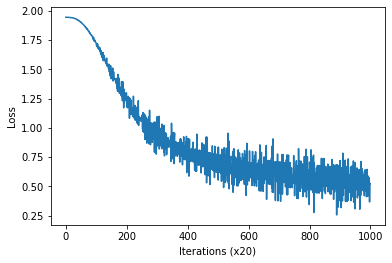

In [51]:
window_size=1
hidden_size=5
batch_size=3
max_epoch=1000
#contexts,text,target 등은 위에 있으니 생략
model=SimpleCBOW(vocab_size,hidden_size)
optimizer=Adam()
trainer=Trainer(model,optimizer)

trainer.fit(contexts,target,max_epoch,batch_size)
trainer.plot()